<a href="https://datamics.com/de/courses/"><img src=../../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Distribution (Verteilung) Plots

Lasst uns einige Plots diskutieren, die es uns erlauben die Verteilung von Daten in einem Datensatz zu visualisieren. Diese Diagramme sind:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Installation & Imports

Bevor wir damit beginnen können installieren und/oder importieren wir *Seaborn*:

Zum Installieren gebt in eurer Kommandozeile bzw. eurem Terminal folgenden Befehl ein:

    conda install seaborn
    
Nach der Installation können wir *Seaborn* importieren:

In [1]:
import seaborn as sns
%matplotlib inline

## Daten

*Seaborn* verfügt über eingebaute Datensets, die wir uns zunutze machen können! Der Datensatz den wir jetzt nutzen werden liegt in englischer Sprache vor und beschreibt Daten zum Trinkgeld in einem Restaurant.

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plots
### distplot

Das *distplot* zeigt uns die Verteilung (en. Distribution) eines univariaten Satzes von Beobachtungen an.

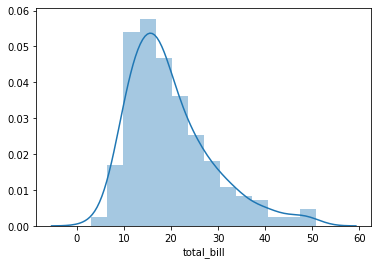

In [4]:
sns.distplot(tips["total_bill"])

Um nur das Histogramm anzuzeigen nutzen wir KDE (Kernel Density Estimation):

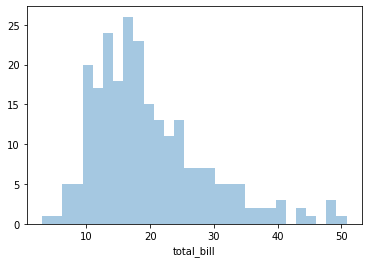

In [5]:
sns.distplot(tips["total_bill"],kde=False,bins=30)

### jointplot

`jointplot()` ermöglicht es im Grunde genommen zwei *distplots* zu vereinen, um bivariate Daten zu visualisieren. Dabei können wir eine Wahl der Art (en.: kind) der Darstellung treffen:

* scatter
* reg
* resid
* kde
* hex

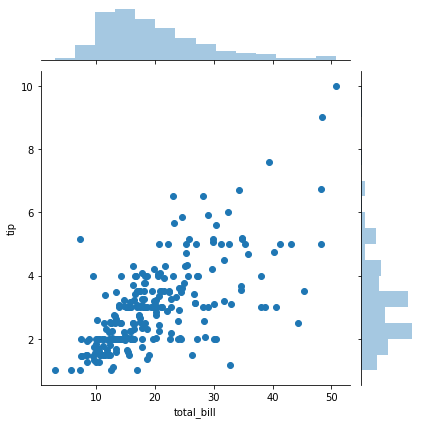

In [6]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="scatter")

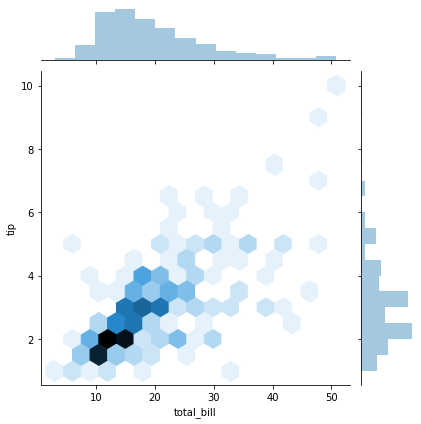

In [7]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")

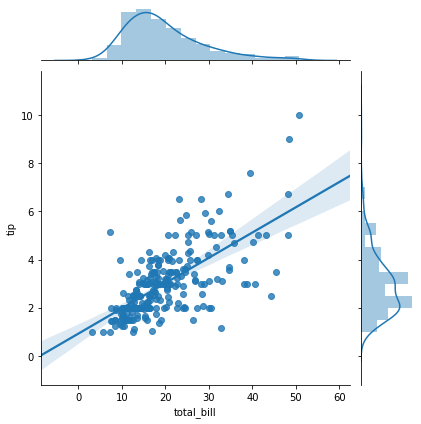

In [8]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="reg")

### pairplot

Das Diagramm *pairplot* zeigt paarweise Beziehungen in einem kompletten Dataframe. Für kategorische Variablen können wir über das `hue` Argument die Farbe einstellen.

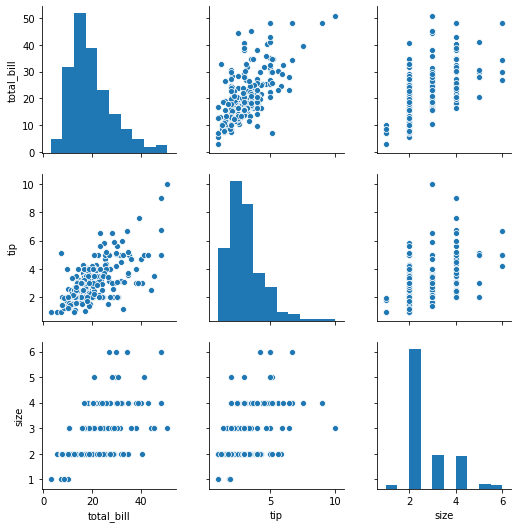

In [9]:
sns.pairplot(tips)

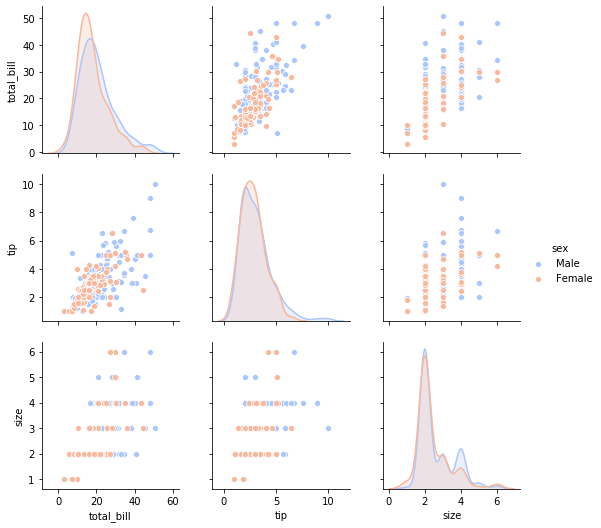

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

*rugplots* folgen eigentlich einem sehr simplen Konzept: Sie zeichnen einfach einen Strich für jeden Piunkt einer univariaten Verteilung. Sie sind ein Bestandteil eines KDE-Plots (den wir anschließend kennenlernen werden).

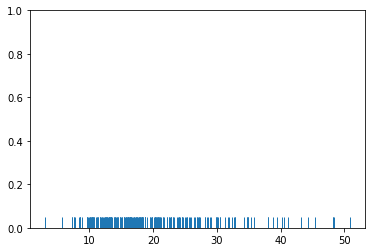

In [11]:
sns.rugplot(tips['total_bill'])

### kdeplot

*kdeplots* sind [Kerndichteschätzer](https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer) (en.: Kernel density estimation). Diese KDE Plots ersetzen jede einzelne Beobachtung mit einer Gausschen (Normal-) Verteilung, die am beobachteten Wert zentriert ist. Zum Beispiel:

(0, 1)

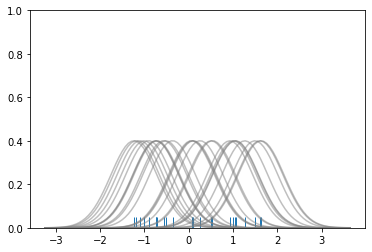

In [12]:
# Keine Sorge, ihr müsst diesen Code nicht verstehen!
# Er soll nur das nachfolgende Diagramm erzeugen
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Datensatz erstellen
dataset = np.random.randn(25)

# Ein weiteres rugplot erstellen
sns.rugplot(dataset);

# Die x-Achse des Plot einstellen
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 gleich verteilte Punkte von x_min bis x_max
x_axis = np.linspace(x_min,x_max,100)

# Die Bandbreite (en.: bandwidth) einstellen. Mehr Infos zur Bandbreite:
url = 'https://de.wikipedia.org/wiki/Kerndichtesch%C3%A4tzer#Satz_von_Nadaraya'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Eine leere Liste erstellen
kernel_list = []

# Jede Funktion visualisieren
for data_point in dataset:
    
    # Für jeden Punkt wird ein Kernel erstellt und der Liste angefügt
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Skalieren für die Darstellung
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Summe der Basisfunktionen')

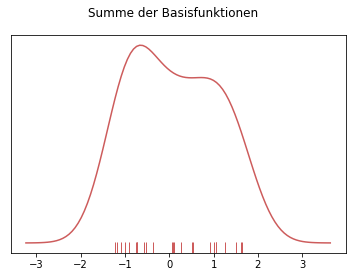

In [13]:
# Um das KDE-Plot zu erhalten können wir diese Funktionen summieren.

# Zeiche die Summe der Basisfunktionen
sum_of_kde = np.sum(kernel_list,axis=0)

# Diagramm zeigen
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Das erste rugplot hinzufügen
sns.rugplot(dataset,c = 'indianred')

# Die y-tick-Markierungen entfernen
plt.yticks([])

# Titel definieren
plt.suptitle("Summe der Basisfunktionen")

Mit unserem Trinkgeld-Datensatz:

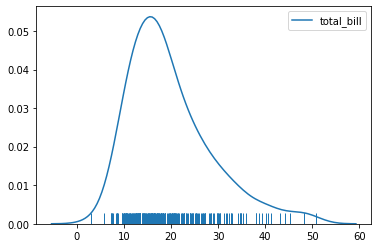

In [14]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

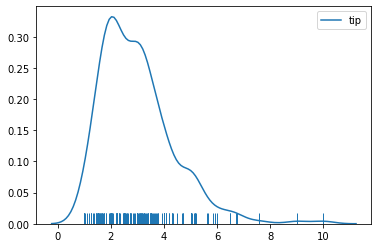

In [15]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Gut gemacht!